# Data cleaning in session.

In [49]:
#Wl must import again -.-
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [50]:
indeed = pd.read_pickle('indeed.pickle')
tia = pd.read_pickle('tia.pickle')

In [51]:
indeed.shape

(990, 9)

In [52]:
indeed.head()

,company,duration,location,rating,review,salary,source,summary,title
0,MSD,30+ days ago,Singapore,52.2,375,None,My Skills Future,The Data Scientist will use information and mo...,Junior Data Scientist
1,MSD,30+ days ago,Singapore,52.2,375,None,My Skills Future,We are looking for a Data Scientist to support...,Data Scientist
2,GlaxoSmithKline,13 days ago,Singapore,52.2,"2,709",None,My Skills Future,Your Responsibilities: :\n\nThe Role\n\n\nIn t...,Data Insights Analyst
3,Carousell,10 days ago,Singapore,None,None,None,Careers@Gov,Love buying and selling on Carousell? Then mee...,Data Analyst
4,Illumina,16 days ago,Singapore,42.6,110,"Full-time, Internship, Permanent",InternSG,Spend your summer being part of something bigg...,Data Analyst Intern


In [53]:
indeed.isnull().sum()

company       3
duration      1
location      1
rating      447
review      447
salary      673
source      175
summary       1
title         1
dtype: int64

Normally when we see a column with high Nan values we would drop it

But interestingly the very column is the whatever that we want to predict so we cannot drop that :/

In [54]:
indeed[indeed['summary'].isnull()]
#Oh you pesky little one

,company,duration,location,rating,review,salary,source,summary,title
56,None,None,None,None,None,About,None,None,None


In [55]:
#Delete that row of course
indeed.dropna(subset=['summary'], inplace=True)
indeed.isnull().sum()

company       2
duration      0
location      0
rating      446
review      446
salary      673
source      174
summary       0
title         0
dtype: int64

In [56]:
import unicodedata
def clean_unicode(unicode_str):      #Credit to Yingling
    return unicodedata.normalize("NFKD", unicode_str)

indeed['summary_clean'] = indeed['summary'].apply(lambda x: x.replace('\n',' '))
indeed['summary_clean'] = indeed['summary_clean'].apply(clean_unicode)

#But apparently it didn't work, nvm

In [57]:
indeed['summary_clean'][1]

u'We are looking for a Data Scientist to support our social media command center team to drive business analytics insights for our APAC region. He or she will be part of the data science team within Global Innovation Network (GIN) based in Singapore supporting the needs of AP regional command centers. The candidate is expected to develop a roadmap to design visualizations and automate our reporting. The candidate is also required to work closely with the global social media enterprise team and external partners.  The role is required to leverage our social media datasets to supplement existing market research data and guide brand teams in developing their commercial brand strategy. You will work with a range of platforms and tools to provide clear and actionable insights for our business stakeholders.  Key Responsibilities  Collaborate with the Social Media Analyst on all social listening data mining and requirements from the business by providing:  Perform text-mining analysis, data v

We work with indeed data first

In [58]:
#We get the middle value of the salary range 
def clean_salary(x):
    if x is not None:
        slist = [y.replace('$', '').replace(',','') for y in x.split() if re.findall('\d', y)]
        slist = [int(y) for y in slist]
        avg = np.mean(slist)
        if avg > 10000:
            avg = avg/12
        return avg
indeed['salary_clean'] = indeed['salary'].apply(clean_salary)

In [59]:
useful_indeed = indeed[~indeed['salary_clean'].isnull()]
useful_indeed.shape
#Wow that is so small!

(23, 11)

In [60]:
useful_indeed.isnull().sum()
#We cannot use rating, review and source hmm

company           0
duration          0
location          0
rating           21
review           21
salary            0
source           16
summary           0
title             0
summary_clean     0
salary_clean      0
dtype: int64

In [61]:
indeed[indeed.duplicated(subset=['company','title'], keep=False)]

,company,duration,location,rating,review,salary,source,summary,title,summary_clean,salary_clean
509,Info-communications Media Development Authority,12 days ago,Singapore,None,None,Contract,Careers@Gov,Responsibilities:\n\n\nOperations Management\n...,"Senior Manager (Operations), TechSkills Accele...",Responsibilities: Operations Management Ove...,NaN
655,Argyll Scott,27 days ago,Pasir Ris,None,None,None,My Skills Future,Deep dive into our data to uncover actionable ...,Senior Data Analyst,Deep dive into our data to uncover actionable ...,NaN
873,Info-communications Media Development Authority,12 days ago,Clementi,None,None,Contract,My Skills Future,Responsibilities:\n\n\nOperations Management\n...,"Senior Manager (Operations), TechSkills Accele...",Responsibilities: Operations Management Ove...,NaN
959,Argyll Scott,13 days ago,Singapore,None,None,"Full-time, Permanent",My Skills Future,I am looking for a Senior Data Analyst for a l...,Senior Data Analyst,I am looking for a Senior Data Analyst for a l...,NaN


In [62]:
indeed['duration'][509][:-9]

u'12'

In [63]:
def what_duration(x):
    string = x[:-9]
    if string == '30+':
        string = '30'
    try:
        num = int(string)
    except:
        num = np.nan
    return num

indeed['duration_int'] = indeed['duration'].apply(what_duration)

In [64]:
indeed['location'].value_counts()

Singapore                    730
Outram                        44
Clementi                      33
Tanjong Pagar                 27
Queenstown                    20
Jurong                        13
Central Singapore             13
Tiong Bahru Estate            12
Woodlands                      8
Toa Payoh                      8
Pasir Ris                      7
Yishun                         6
Bukit Merah                    5
Central Business District      5
Bishan New Town                4
Changi                         4
Bedok                          4
Marina Bay                     4
Pasir Panjang                  3
Beach Rd                       3
Kallang                        2
Tuas                           2
Paya Lebar                     2
Ang Mo Kio                     2
Bugis                          2
MacPherson                     2
Orchard                        2
Geylang                        2
Thomson                        1
Bukit Timah                    1
East Coast

Ok how about Tech in Asia jobs

In [65]:
tia.head()

,chunk,company,date,location,salary,skills,title
0,Job description & requirementsAssistant Manage...,Singapore Land Authority,Date created: 30 Jan 2018,"Singapore, Singapore","SGD 4,200 – 6,800","[Information Technology, Big Data, Databases, ...","Assistant Manager, GeoAnalytics"
1,Job description & requirementsSenior / Princip...,Singapore Land Authority,Date created: 30 Jan 2018,"Singapore, Singapore","SGD 2,800 – 5,600","[Databases, Python, R]",Senior / Principal Geospatial Consultant
2,Job description & requirementsTech in Asia (YC...,Tech in Asia,Date created: 28 Jan 2018,"Singapore, Singapore","SGD 4,500 – 6,000 with equity","[Amazon Web Services (AWS), Data Visualization...",Data Scientist
3,Job description & requirementsOur people is as...,Converzion,Date created: 26 Jan 2018,"Singapore, Singapore","SGD 3,000 – 4,000","[Data Analysis, Google Analytics]",Marketing Analyst
4,Job description & requirementsJob Description:...,Cloudzen,Date created: 25 Jan 2018,"Singapore, Singapore","SGD 3,000 – 4,500","[Backend Development, C#, .NET]",Software Developer (C# / Azure / .Net)


In [66]:
tia['salary_clean'] = tia['salary'].apply(clean_salary)
tia.head()

,chunk,company,date,location,salary,skills,title,salary_clean
0,Job description & requirementsAssistant Manage...,Singapore Land Authority,Date created: 30 Jan 2018,"Singapore, Singapore","SGD 4,200 – 6,800","[Information Technology, Big Data, Databases, ...","Assistant Manager, GeoAnalytics",5500.0
1,Job description & requirementsSenior / Princip...,Singapore Land Authority,Date created: 30 Jan 2018,"Singapore, Singapore","SGD 2,800 – 5,600","[Databases, Python, R]",Senior / Principal Geospatial Consultant,4200.0
2,Job description & requirementsTech in Asia (YC...,Tech in Asia,Date created: 28 Jan 2018,"Singapore, Singapore","SGD 4,500 – 6,000 with equity","[Amazon Web Services (AWS), Data Visualization...",Data Scientist,5250.0
3,Job description & requirementsOur people is as...,Converzion,Date created: 26 Jan 2018,"Singapore, Singapore","SGD 3,000 – 4,000","[Data Analysis, Google Analytics]",Marketing Analyst,3500.0
4,Job description & requirementsJob Description:...,Cloudzen,Date created: 25 Jan 2018,"Singapore, Singapore","SGD 3,000 – 4,500","[Backend Development, C#, .NET]",Software Developer (C# / Azure / .Net),3750.0


In [67]:
tia.shape

(60, 8)

In [68]:
skills_collection = []
for x in tia['skills']:
    for y in x:
        if y in skills_collection:
            continue
        else:
            skills_collection.append(y)
print skills_collection

[u'Information Technology', u'Big Data', u'Databases', u'Data Warehouse', u'Data Visualization', u'Data Science', u'Relational Databases', u'Data Mining', u'Data Management', u'Data Analysis', u'Hive', u'NoSQL', u'Python', u'R', u'Tableau', u'Business Intelligence', u'Amazon Web Services (AWS)', u'Scala', u'Analytics & Reporting', u'Natural Language Processing (NLP)', u'SQL', u'Linux', u'A/B Testing', u'Google Analytics', u'Backend Development', u'C#', u'.NET', u'Machine Learning', u'Artificial Intelligence (AI)', u'Algorithms', u'Software Engineering', u'Blockchain', u'Software Development', u'HTML+CSS', u'HTML5 & CSS3', u'jQuery', u'Bootstrap', u'JSON', u'Cloud Computing', u'Mobile Development', u'MySQL', u'PostgreSQL', u'Research & Development (R&D)', u'Analytics', u'Training', u'Business Planning', u'Financial Analysis', u'Management Consulting', u'Analytical Skills', u'Statistical Analysis', u'Cyber Security', u'Information Security', u'Linux System Administration', u'Unix', u'Ful

Problem:

'C' and 'R' will be oversampled because of capturing wrong data i.e. 'R' will register for the word 'Reach' or any capital letter R attached to a word, and likewise for 'C'.

Well too bad about that!

More processing has to be done!

In [69]:
skills_refine = list(skills_collection)
for delete in ['HTML+CSS','HTML5 & CSS3','C/C++','Natural Language Processing (NLP)','Artificial Intelligence (AI)',
              'Amazon Web Services (AWS)','Research & Development (R&D)','Linux System Administration']:
    skills_refine.remove(delete)


for add in ['HTML','CSS','C++','Natural Language Processing','NLP','Amazon Web Services','AWS','Artificial Intelligence','AI',
           'Linux','Research & Development','R&D']:
    skills_refine.append(add)
print skills_refine
print skills_collection

[u'Information Technology', u'Big Data', u'Databases', u'Data Warehouse', u'Data Visualization', u'Data Science', u'Relational Databases', u'Data Mining', u'Data Management', u'Data Analysis', u'Hive', u'NoSQL', u'Python', u'R', u'Tableau', u'Business Intelligence', u'Scala', u'Analytics & Reporting', u'SQL', u'Linux', u'A/B Testing', u'Google Analytics', u'Backend Development', u'C#', u'.NET', u'Machine Learning', u'Algorithms', u'Software Engineering', u'Blockchain', u'Software Development', u'jQuery', u'Bootstrap', u'JSON', u'Cloud Computing', u'Mobile Development', u'MySQL', u'PostgreSQL', u'Analytics', u'Training', u'Business Planning', u'Financial Analysis', u'Management Consulting', u'Analytical Skills', u'Statistical Analysis', u'Cyber Security', u'Information Security', u'Unix', u'Full-stack Web Development', u'Mobile Application Development', u'Strategy', u'Communications', u'Consulting', u'Business Analysis', u'Java', u'Matlab', u'Hadoop', u'Software', u'QA', u'Oracle', u'We

In [70]:
#Now we need to mod tia skillsets too:
def mod_skill(x):
    newlist = list(x) #Make a copy
    for skill in x:
        if 'HTML+CSS' in skill:
            newlist.remove('HTML+CSS')
            newlist.append('HTML')
            newlist.append('CSS')
        elif 'HTML5 & CSS3' in skill:
            newlist.remove('HTML5 & CSS3')
            newlist.append('HTML')
            newlist.append('CSS')
        if 'C/C++' in skill:
            newlist.remove('C/C++')
            newlist.append('C')
            newlist.append('C++')
        if 'Natural Language Processing (NLP)' in skill:
            newlist.remove('Natural Language Processing (NLP)')
            newlist.append('NLP')
        if 'Artificial Intelligence (AI)' in skill:
            newlist.remove('Artificial Intelligence (AI)')
            newlist.append('AI')
        if 'Amazon Web Services (AWS)' in skill:
            newlist.remove('Amazon Web Services (AWS)')
            newlist.append('AWS')
        if 'Research & Development (R&D)' in skill:
            newlist.remove('Research & Development (R&D)')
            newlist.append('R&D')
        if 'Linux System Administration' in skill:
            newlist.remove('Linux System Administration')
            newlist.append('Linux')
        return newlist

tia['skills'] = tia['skills'].apply(mod_skill)

In [71]:
#use in indeed heh
def identify_skills(x, skill_list):
    newlist=[]
    for skill in skill_list:
        if skill in x:
            newlist.append(skill)
    return newlist

indeed['skills'] = indeed['summary_clean'].apply(identify_skills, skill_list=skills_refine)

In [72]:
indeed['skills'][21]

[u'Data Warehouse',
 u'Data Analysis',
 u'Python',
 u'R',
 u'Tableau',
 u'Business Intelligence',
 u'SQL',
 u'Analytics',
 u'Unix',
 u'Business Analysis',
 u'C',
 u'Statistics']

In [73]:
#Lettuce look at the TIA date
tia['date'][0][14:]

u'30 Jan 2018'

In [74]:
#All formatting is the same so just cut the wordings
#RUN ONCE ONLY
tia['date'] = tia['date'].apply(lambda x: x[14:])
tia['date'][0]

u'30 Jan 2018'

In [75]:
tia['date'] = pd.to_datetime(tia['date'])

In [76]:
duration = tia['date'].apply(lambda x:dt.date(2018,1,30) -  x.date())

In [77]:
tia['duration'] = duration

In [78]:
tia[tia['duration']>dt.timedelta(30)]

,chunk,company,date,location,salary,skills,title,salary_clean,duration
35,Job description & requirementsCore duties and ...,JobKred,2017-12-26,"Singapore, Singapore","SGD 3,000","[Python, R, Java, Matlab, Hadoop, Natural Lang...",Data Scientist,3000.0,35 days
36,Job description & requirementsLauretta.io is o...,Lauretta.io,2017-12-26,"Singapore, Singapore","SGD 1,400 – 3,000","[Machine Learning, Software, AI]",Junior AI Engineer,2200.0,35 days
37,Job description & requirements99.co is looking...,99.co,2017-12-21,"Singapore, Singapore","SGD 2,200 – 2,500","[Data Management, QA, Data Mining]",Data Operations Executive,2350.0,40 days
38,Job description & requirementsResponsibilities...,Healint,2017-12-21,"Singapore, Singapore","SGD 2,000 – 4,000","[Analytics & Reporting, Communications]",Practical UX Analyst,3000.0,40 days
39,Job description & requirementsThe Data Archite...,OSIM International Pte Ltd,2017-12-19,"Singapore, Singapore","SGD 4,700 – 7,000","[SQL, Data Mining, Oracle]",Data Architect,5850.0,42 days
40,Job description & requirementsJob Description:...,Mama Wosh,2017-12-15,"Singapore, Singapore","SGD 500 – 1,500","[Web Analytics, Data Analysis, Market Research...",Web and Data Analytics Intern,1000.0,46 days
41,Job description & requirementsYou will be lead...,Portcast,2017-12-13,"Singapore, Singapore","SGD 3,500 – 5,000","[Data Science, Analytics, Machine Learning, Ar...",Data Scientist,4250.0,48 days
42,Job description & requirementsIn this intern p...,PropertyGuru,2017-12-12,"Singapore, Singapore",,"[Python, Data Warehouse]",Data Engineer intern,NaN,49 days
43,Job description & requirementsJob Description\...,Capgemini,2017-12-07,"Singapore, Singapore","SGD 8,000 – 11,000","[Data Science, Analytics]",Data Scientist Lead,9500.0,54 days
44,Job description & requirementsWe are searching...,Wismut Labs Pte. Ltd.,2017-11-28,"Singapore, Singapore (Remote)","SGD 4,000 – 6,000","[Data Analysis, Data Management, Data Science,...",Data Engineer / Data Scientist,5000.0,63 days


In [79]:
tia['duration_int'] = tia['duration'].apply(lambda x: (x/np.timedelta64(1, 'D')).astype(int))

In [80]:
#RUN ONCE
def tia_loc(x):
    if 'Remote' in x:
        return 'Singapore (Remote)'
    else:
        return (x.split(',')[0])

tia['location'] = tia['location'].apply(tia_loc)

In [81]:
tia['summary_clean'] = tia['chunk'].apply(lambda x: x.replace('\n',' '))

Why did I even bother about duration sigh

In [82]:
#We should categorize based on job titles too

#Below function credit to Bowen and Kelvin  (ok I forgot who but Bowen last touch)
def is_category(x):
    x = x.lower()
    ans="dont_care"
    
    if "analyst" in x:
        ans="analyst" 
    
    if "database" in x or 'data base'in x:
        ans="database"
    if "scientist" in x or "research" in x:
        ans="scientist"
        
    engin_set = ['engineer','dev','operation','architect', 'admin',
                 'program','analy','miner','algorithm']
    for item in engin_set:
        if item in x:
            ans="engineer"
            break
            
    leadership_set = ['head','director','manager','consult','lead','vp','presi','chief']
    for item in leadership_set:
        if item in x:
            ans = "leadership"
            break
    
    if ("intern" in x):
        ans = "intern"
    return(ans)

In [83]:
indeed['category'] = indeed['title'].apply(is_category)
tia['category'] = tia['title'].apply(is_category)

In [84]:
indeed.columns

Index([u'company', u'duration', u'location', u'rating', u'review', u'salary',
       u'source', u'summary', u'title', u'summary_clean', u'salary_clean',
       u'duration_int', u'skills', u'category'],
      dtype='object')

In [85]:
#Create new dataframes in preparation of feature engineering
indeed1 = indeed[['company','location','skills','title','salary_clean','category','duration_int','summary_clean']]
indeed1.shape

(989, 8)

In [86]:
tia1 = tia[['company','location','skills','title','salary_clean','category','duration_int','summary_clean']]
tia1.shape

(60, 8)

In [87]:
#Put the indeed and tia data together, then clean some more
aldf = indeed1.append(tia1, ignore_index=True)

In [88]:
#Category is easy cos values are in simple string form
category_dummies = pd.get_dummies(aldf['category'])
#Skill is in list form, how sia
#Some wizard from stack overflow saves the day
#Source: https://stackoverflow.com/a/25208947
skill_dummies = aldf['skills'].str.join(sep='*').str.get_dummies(sep='*') #Wow what magic I wish I can remember this somewhere

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
#Tfidf would probably cause overfitting I think
countvec_1 = CountVectorizer(ngram_range=(2,3), stop_words='english', max_features=2000)
lol = aldf[~aldf['salary_clean'].isnull()][['summary_clean']] #With salary
countveci = countvec_1.fit_transform(lol['summary_clean'])
lol_dummies = pd.DataFrame(countveci.todense(), columns=countvec_1.get_feature_names())

#Use words found in data with salary to fit the rest
lel = aldf[aldf['salary_clean'].isnull()][['summary_clean']] #Without salary
countvec_2 = CountVectorizer(ngram_range=(2,3), stop_words='english', vocabulary=countvec_1.get_feature_names())
countvecii = countvec_2.fit_transform(lel['summary_clean'])
lel_dummies = pd.DataFrame(countvecii.todense(), columns=countvec_2.get_feature_names())

In [90]:
lol_dummies.head()

,00 000,00 000 00,00 200,00 200 00,00 500,00 500 00,00 600,00 600 00,00 month,00 monthjob,...,years relevant experience,years work,years work experience,years working,years working experience,yearsjob location,yearsjob location singapore,yearsrequired education,yearsrequired education bachelor,yearsrequired language
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
lel_dummies.head()

,00 000,00 000 00,00 200,00 200 00,00 500,00 500 00,00 600,00 600 00,00 month,00 monthjob,...,years relevant experience,years work,years work experience,years working,years working experience,yearsjob location,yearsjob location singapore,yearsrequired education,yearsrequired education bachelor,yearsrequired language
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
more_dummies = category_dummies.join(skill_dummies)

#Build the X
X_know = more_dummies[~aldf['salary_clean'].isnull()].join(lol_dummies)
X_know.fillna(0, inplace=True)
X_dunno = more_dummies[aldf['salary_clean'].isnull()].join(lel_dummies)
X_dunno.fillna(0, inplace=True)

#Build the y also
y_know = aldf[~aldf['salary_clean'].isnull()]['salary_clean']
#What lol do you think I was gonna build y_dunno? Gotcha wahahahahaha

X_know.head()

,database,dont_care,engineer,intern,leadership,scientist,.NET,A/B Testing,AI,AWS,...,years relevant experience,years work,years work experience,years working,years working experience,yearsjob location,yearsjob location singapore,yearsrequired education,yearsrequired education bachelor,yearsrequired language
6,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
31,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
#Check shape first
X_know.shape

(75, 2101)

In [94]:
y_know.shape

(75L,)

## Let the training begin

## Strategy

As per the requirements of the question,
For question 1 I'll run an Random Forest Regressor model followed by Lasso Regression
Why? Because idk

Then for question 2 we change the y value to category,
Then I'll run with a forest again followed by what idk yet

Can I not answer the bonus question? Pretty please

In [95]:
#Now what model to use hmm
#We try
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
score10 = 0
for i in np.arange(2,10):
    score1 = 0
    rfr = RandomForestRegressor(min_samples_split=i)
    b = 1
    for n in np.arange(1,10):
        score = cross_val_score(rfr, X_know, y_know, cv=3)
        score = np.mean(score)
        if score1 < score:
            score1 = score
            b += 1
        else:
            print score1
            break
    if score10 < score1:
        score10 = score1
    else:
        print score10
        break
yhat = cross_val_predict(rfr, X_know, y_know, cv=b)

0.128058332084
0.161021487278
0.216102480304
0.204947114833
0.216102480304


Text(0,0.5,u'y_pred')

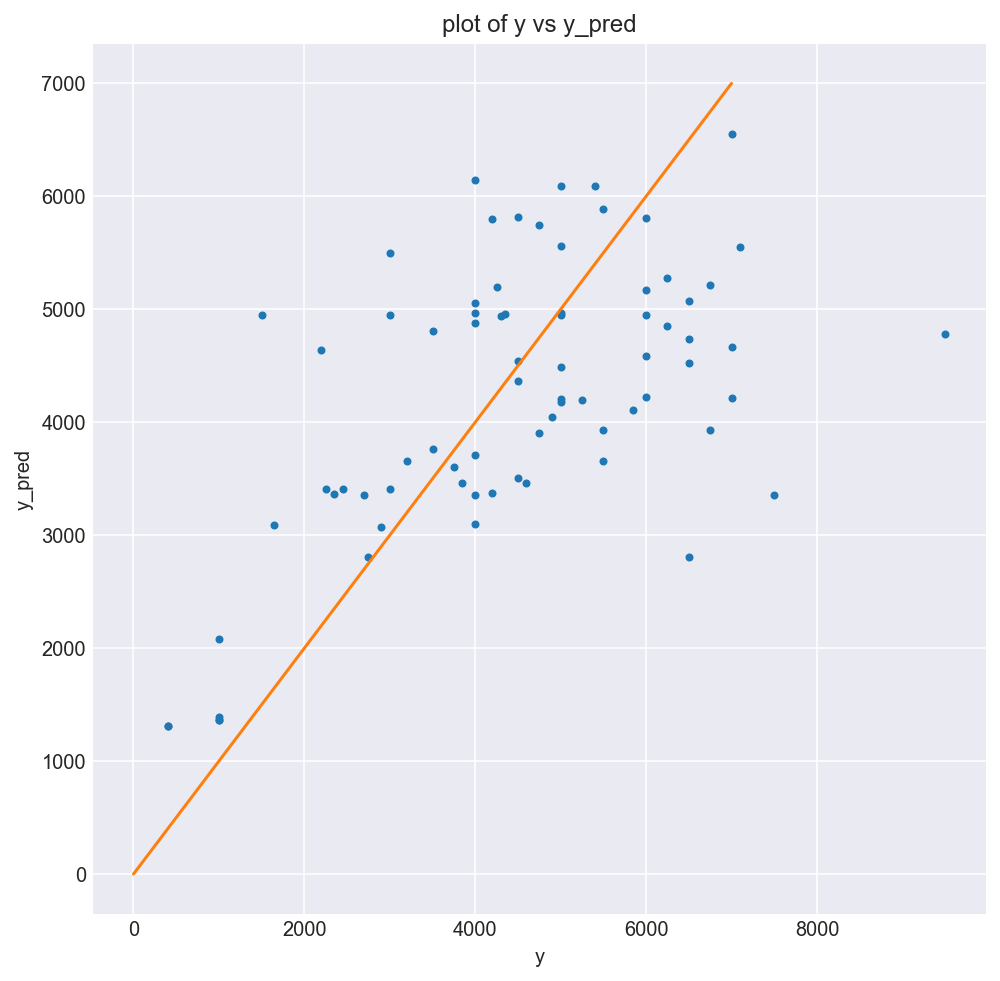

In [96]:
seehowlah = pd.DataFrame(np.array([yhat, y_know]).T, columns=['y_pred','y'])
plt.figure(figsize=(8,8))
plt.plot(seehowlah['y'],seehowlah['y_pred'], marker='.', ls='None')
plt.plot([0,7000],[0,7000])
plt.title('plot of y vs y_pred')
plt.xlabel('y')
plt.ylabel('y_pred')

ok lah

In [98]:
#Our good old linear regression
from sklearn.linear_model import Lasso, LassoCV
alpha1 = 0
for n in np.arange(2,10):
    lcv = LassoCV(cv=n)
    alpha = lcv.fit(X_know, y_know).alpha_
    if alpha1 < alpha:
        alpha1 = alpha
    else:
        print alpha1
        break
lasi = Lasso(alpha=alpha1)
modell = lasi.fit(X_know, y_know)
yhaty = modell.predict(X_know)
score = modell.score(X_know, y_know)
print score

33.5729042656
0.592519763789


Text(0,0.5,u'y_pred')

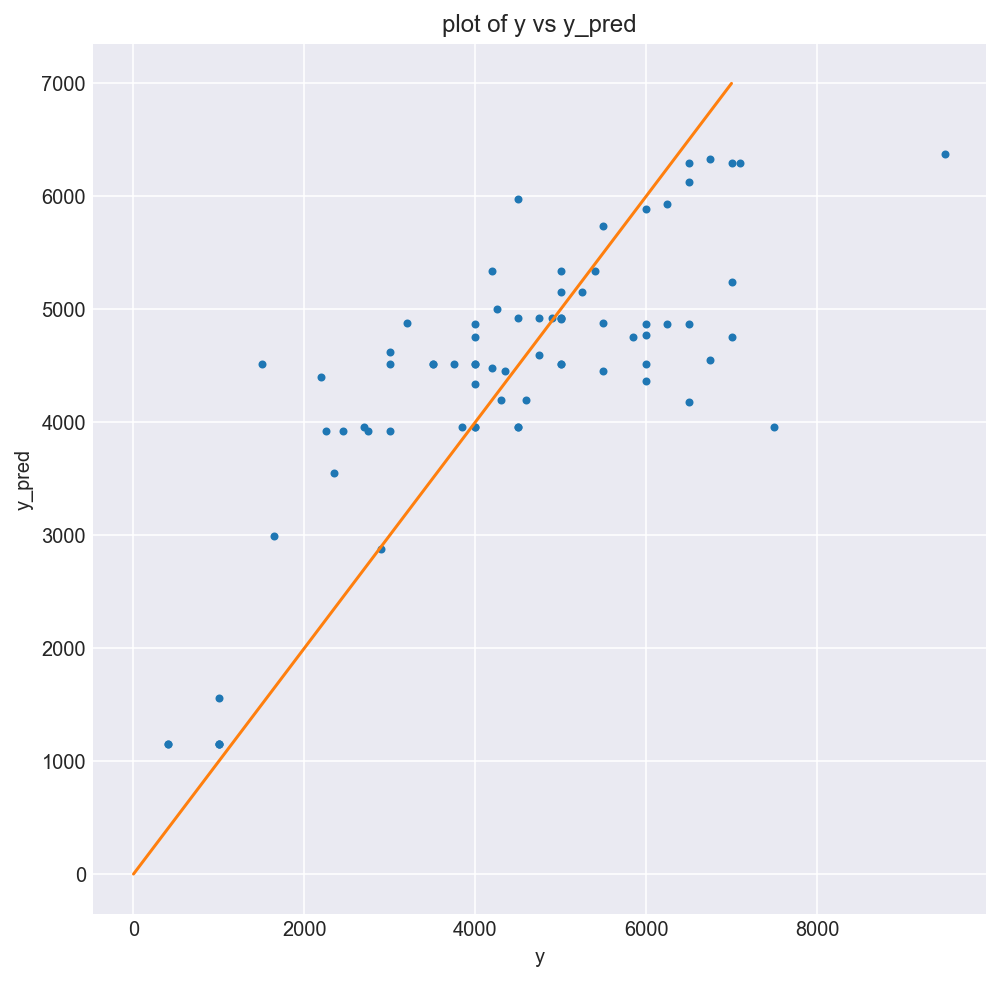

In [99]:
seehow = pd.DataFrame(np.array([yhaty, y_know]).T, columns=['y_pred','y'])
plt.figure(figsize=(8,8))
plt.plot(seehow['y'],seehow['y_pred'], marker='.', ls='None')
plt.plot([0,7000],[0,7000])
plt.title('plot of y vs y_pred')
plt.xlabel('y')
plt.ylabel('y_pred')

2nd one look better but interestingly the relationship looks abit non-linear

No matter, we fit into the bigger data!

In [100]:
yhat_summore = modell.predict(X_dunno)
#Ah predict already how? I dunno how to put back :X

In [101]:
#ok actually I know
newmod = X_dunno
newmod['y_pred'] = yhat_summore
topten = newmod.sort_values('y_pred', ascending=False).head(10)
topten.loc[:, (topten != 0).any(axis=0)]

#Ok actually its abit hard to quantify but at least all are in leadership positions and have C++, cant see anything else

,leadership,AI,Algorithms,Analytics,Big Data,Business Intelligence,C,C#,C++,Communications,...,written verbal,written verbal communication,years experience,years experience working,years relevant,years work,years work experience,years working,years working experience,y_pred
907,1,0,0,0,1,0,1,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6551.378874
250,1,1,0,1,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6376.382117
287,1,0,0,1,1,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,6321.032431
493,1,0,0,1,0,0,1,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6321.032431
644,1,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6293.924786
129,1,0,0,0,0,0,1,0,1,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6236.042702
820,1,0,0,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6236.042702
283,1,0,0,1,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6213.497778
310,1,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6147.384733
170,1,0,0,1,0,0,1,0,0,0,...,1.0,1.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,6082.455028


In [102]:
topten.loc[:, (topten != 0).any(axis=0)].columns

Index([                  u'leadership',                           u'AI',
                         u'Algorithms',                    u'Analytics',
                           u'Big Data',        u'Business Intelligence',
                                  u'C',                           u'C#',
                                u'C++',               u'Communications',
       ...
                     u'written verbal', u'written verbal communication',
                   u'years experience',     u'years experience working',
                     u'years relevant',                   u'years work',
              u'years work experience',                u'years working',
           u'years working experience',                       u'y_pred'],
      dtype='object', length=221)

In [103]:
newmodmod = X_know
newmodmod['y_pred'] = yhaty
newmoddie = pd.concat([newmod, newmodmod])
newmoddie.head()

,database,dont_care,engineer,intern,leadership,scientist,.NET,A/B Testing,AI,AWS,...,years work,years work experience,years working,years working experience,yearsjob location,yearsjob location singapore,yearsrequired education,yearsrequired education bachelor,yearsrequired language,y_pred
0,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4284.188645
1,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4603.193056
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4045.611241
3,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4199.198915
4,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,921.920964


In [104]:
aldf['salary_predict'] = newmoddie['y_pred']

In [105]:
#See if the putting  in is a success
aldf[['salary_clean','salary_predict']]

,salary_clean,salary_predict
0,NaN,4284.188645
1,NaN,4603.193056
2,NaN,4045.611241
3,NaN,4199.198915
4,NaN,921.920964
5,NaN,3925.052241
6,6750.0,6330.338697
7,NaN,4603.193056
8,NaN,4364.615653
9,NaN,4218.075600


# Ok Question 2

In [106]:
aldf.head()

,company,location,skills,title,salary_clean,category,duration_int,summary_clean,salary_predict
0,MSD,Singapore,"[Information Technology, R, Tableau, SQL, Anal...",Junior Data Scientist,NaN,scientist,30.0,The Data Scientist will use information and mo...,4284.188645
1,MSD,Singapore,"[Data Science, Python, R, Business Intelligenc...",Data Scientist,NaN,scientist,30.0,We are looking for a Data Scientist to support...,4603.193056
2,GlaxoSmithKline,Singapore,"[R, Business Intelligence, Machine Learning, A...",Data Insights Analyst,NaN,engineer,13.0,Your Responsibilities: : The Role In this n...,4045.611241
3,Carousell,Singapore,"[Python, R, SQL, C]",Data Analyst,NaN,engineer,10.0,Love buying and selling on Carousell? Then mee...,4199.198915
4,Illumina,Singapore,"[NoSQL, Python, R, SQL, C#, MySQL, Analytics, ...",Data Analyst Intern,NaN,intern,16.0,Spend your summer being part of something bigg...,921.920964


In [107]:
y_cat = aldf['category']
y_cat.shape

(1049L,)

In [108]:
y_cat.value_counts()
#Oh only one database :/ well too bad about database then
#But I lazy to drop

engineer      404
leadership    284
dont_care     192
scientist     124
intern         44
database        1
Name: category, dtype: int64

In [109]:
#This time im gonna use tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(2,3), stop_words='english', max_features=2000)
tfmod = tfidf.fit_transform(aldf['summary_clean'])
tfidfdummiee = pd.DataFrame(tfmod.todense(), columns=tfidf.get_feature_names())
tfidfdummiee.head()

,00 monthrequired,00 monthrequired experience,000 00,000 employees,000 people,10 years,10 years experience,100 countries,15 years,3rd party,...,years related experience,years relevant,years relevant experience,years relevant work,years relevant working,years work,years work experience,years working,years working experience,yearsrequired education
0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.065868,0.000000,0.107405,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.117068,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.125439,0.12211,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.071513,0.086605,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
X_cat = pd.concat([tfidfdummiee, skill_dummies, aldf[['salary_predict','duration_int']]], axis=1)
X_cat.shape

(1049, 2097)

In [111]:
X_cat.fillna(0, inplace=True)

In [112]:
#Run once!
#Oh in the end I got drop
y_cat = y_cat[~(aldf['category'] == 'database')]
X_cat = X_cat[~(aldf['category'] == 'database')]

In [113]:
#Lai model again
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)
abc = AdaBoostClassifier(random_state=145)
modeled = abc.fit(X_train, y_train)
yhut = modeled.predict(X_test)
print classification_report(y_test, yhut)
#Models intern and leadership well but as for the rest well
#

             precision    recall  f1-score   support

  dont_care       0.00      0.00      0.00        43
   engineer       0.52      1.00      0.69        77
     intern       1.00      1.00      1.00         8
 leadership       1.00      0.98      0.99        56
  scientist       0.00      0.00      0.00        26

avg / total       0.50      0.67      0.55       210



C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
km = KMeans(n_clusters=5)
modeler = km.fit(X_train)
predi = km.predict(X_test)
print predi

[3 1 0 3 0 0 3 1 1 1 0 1 1 3 3 1 1 0 3 4 1 0 3 0 0 0 3 0 1 4 0 0 3 1 1 2 3
 0 0 3 3 1 0 3 3 1 3 0 3 0 1 3 0 3 2 3 2 0 0 3 3 3 0 0 3 0 4 0 2 1 0 1 0 0
 0 4 3 1 1 0 3 0 1 3 2 0 0 4 4 0 3 4 0 1 0 3 0 0 3 1 3 3 0 0 3 3 3 3 0 1 1
 0 3 4 1 1 4 0 3 1 0 1 4 4 4 3 0 3 3 0 3 3 4 1 3 0 0 1 3 3 2 2 1 3 3 3 0 0
 0 0 0 3 3 1 0 1 0 0 0 1 1 0 0 1 0 3 3 1 0 0 2 3 4 3 0 0 3 4 1 0 4 0 0 3 3
 1 3 0 0 3 1 0 3 0 3 0 3 1 1 3 4 4 1 0 0 3 1 0 3 4]


In [115]:
heehee = pd.DataFrame()
heehee['y'] = y_test
heehee['y_pred'] = predi

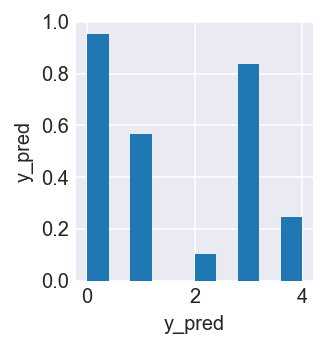

In [116]:
#Ok I give up I dunno how to visualise
sns.pairplot(heehee)

In [117]:
#In life cannot be so gehkiang
#If I dunno how to visualise means I dunno how to visualise sigh